In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [3]:
drugDataDF = pd.read_csv(("drug_deaths.csv"))
pd.set_option('display.max_columns', None)
drugDataDF.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,LocationifOther,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,0,0,1,0.0,0,0,0,1,1,0,0,0,0,0,NaN,0,0,Accident,"CT\r\n(41.575155, -72.738288)","CT\r\n(41.575155, -72.738288)","CT\r\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,FAIRFIELD,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Cocaine Intoxication,NaN,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,Accident,"Norwalk, CT\r\n(41.11805, -73.412906)","NORWALK, CT\r\n(41.11805, -73.412906)","CT\r\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,Hospital,NaN,Substance Abuse,Unknown,UNKNOWN,NaN,NaN,Acute Heroin and Cocaine Intoxication,NaN,1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,Accident,"Danbury, CT\r\n(41.393666, -73.451539)","SANDY HOOK, CT\r\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,Hospital,NaN,substance abuse,Residence,RYE,NaN,NaN,Acute Fentanyl and Morphine Intoxication,NaN,1,0,1,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,Accident,"Greenwich, CT\r\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,Hospital,NaN,Transdermal Absorption,Other,NaN,NaN,NaN,Fentanyl Intoxication,NaN,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,Accident,"Greenwich, CT\r\n(41.026526, -73.628549)",NaN,"CT\r\n(41.575155, -72.738288)"


In [4]:
drugColDF = drugDataDF[['ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'InjuryState', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'Other', 'OpiateNOS', 'AnyOpioid', 'DeathCityGeo']]
drugColDF.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,InjuryState,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo
0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0.0,0,0,0,1,1,0,0,0,0,0,NaN,0,0,"CT\r\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,NaN,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,"Norwalk, CT\r\n(41.11805, -73.412906)"
2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"Danbury, CT\r\n(41.393666, -73.451539)"
3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,1,0,1,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"Greenwich, CT\r\n(41.026526, -73.628549)"
4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,NaN,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,"Greenwich, CT\r\n(41.026526, -73.628549)"


In [5]:
drugLocDF = drugColDF.loc[drugColDF["ResidenceState"] == "CT"]
drugLocDF = drugLocDF.loc[drugColDF["Sex"] != "Unknown"]
drugLocDF = drugLocDF.loc[drugColDF["Race"] != "Unknown"]
drugLocDF.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,InjuryState,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo
2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"Danbury, CT\r\n(41.393666, -73.451539)"
13,15-0232,05/14/2015 12:00:00 AM,1.0,50.0,Male,White,DANBURY,FAIRFIELD,CT,DANBURY,NaN,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"DANBURY, CT\r\n(41.393666, -73.451539)"
14,16-0028,01/13/2016 12:00:00 AM,0.0,29.0,Male,Black,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,NaN,1,0,0,0.0,0,0,0,0,1,0,1,0,0,0,NaN,0,1,"NEW HAVEN, CT\r\n(41.308252, -72.924161)"
18,16-0065,01/30/2016 12:00:00 AM,0.0,54.0,Male,White,MIDDLETOWN,MIDDLESEX,CT,MIDDLETOWN,NaN,1,0,0,0.0,0,0,1,0,0,0,0,0,0,0,NaN,0,1,"MIDDLETOWN, CT\r\n(41.544654, -72.651713)"
19,16-0889,12/20/2016 12:00:00 AM,0.0,32.0,Male,White,WINDHAM,WINDHAM,CT,WINDHAM,NaN,1,0,1,0.0,0,0,0,0,1,0,0,0,0,0,NaN,0,1,"Windham, CT\r\n(41.699744, -72.157703)"


In [6]:
df_int = drugLocDF.copy()
df_int['Age'] = df_int['Age'].astype(int)
df_int['Fentanyl_Analogue'] = df_int['Fentanyl_Analogue'].astype(int)
df_int

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,InjuryState,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo
2,16-0165,03/13/2016 12:00:00 AM,0.0,30,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"Danbury, CT\r\n(41.393666, -73.451539)"
13,15-0232,05/14/2015 12:00:00 AM,1.0,50,Male,White,DANBURY,FAIRFIELD,CT,DANBURY,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"DANBURY, CT\r\n(41.393666, -73.451539)"
14,16-0028,01/13/2016 12:00:00 AM,0.0,29,Male,Black,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,NaN,1,0,0,0,0,0,0,0,1,0,1,0,0,0,NaN,0,1,"NEW HAVEN, CT\r\n(41.308252, -72.924161)"
18,16-0065,01/30/2016 12:00:00 AM,0.0,54,Male,White,MIDDLETOWN,MIDDLESEX,CT,MIDDLETOWN,NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,0,1,"MIDDLETOWN, CT\r\n(41.544654, -72.651713)"
19,16-0889,12/20/2016 12:00:00 AM,0.0,32,Male,White,WINDHAM,WINDHAM,CT,WINDHAM,NaN,1,0,1,0,0,0,0,0,1,0,0,0,0,0,NaN,0,1,"Windham, CT\r\n(41.699744, -72.157703)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,17-0947,12/02/2017 12:00:00 AM,1.0,28,Female,White,MIDDLETOWN,MIDDLESEX,CT,MIDDLETOWN,CT,0,1,1,0,0,0,1,0,0,1,0,0,0,0,NaN,0,0,"Middletown, CT\r\n(41.544654, -72.651713)"
5099,15-0013,01/07/2015 12:00:00 AM,1.0,45,Female,White,WATERBURY,NEW HAVEN,CT,WATERBURY,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"WATERBURY, CT\r\n(41.554261, -73.043069)"
5100,15-0466,09/08/2015 12:00:00 AM,1.0,43,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,NaN,0,0,0,0,0,0,1,0,1,0,0,0,0,0,NaN,0,0,"CHESHIRE, CT\r\n(41.498834, -72.901448)"
5101,17-0618,07/22/2017 12:00:00 AM,1.0,21,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,0,0,"New Haven, CT\r\n(41.308252, -72.924161)"


In [7]:
drugLocDF.to_csv("drug_deaths_clean.csv")

In [8]:
#create new DF with the count of each category
Death_by_race_count =drugLocDF["Race"].value_counts()
Death_by_race_count

White              2689
Hispanic, White     379
Black               300
Hispanic, Black      17
Asian Indian         13
Asian, Other         12
Other                 6
Chinese               2
Hawaiian              1
Name: Race, dtype: int64

In [9]:
#Create Race DF
#Set index and rename column value 
Death_by_race_count = drugLocDF["Race"].value_counts().rename_axis("sub_race_values").reset_index(name='counts')
Death_by_race_count

,sub_race_values,counts
0,White,2689
1,"Hispanic, White",379
2,Black,300
3,"Hispanic, Black",17
4,Asian Indian,13
5,"Asian, Other",12
6,Other,6
7,Chinese,2
8,Hawaiian,1


In [15]:
#Combined_other_race = race_df.replace(Asian Indian, np.Other, inplace = True)
Combined_other_race_df= Death_by_race_count
Combined_other_race_df['sub_race_values'] = Combined_other_race_df['sub_race_values'].replace(['Asian Indian','Asian, Other','Other','Chinese','Hawaiian','Hispanic, Black','Hispanic, White' ],['Asian and Some Other','Asian and Some Other','Asian and Some Other','Asian and Some Other','Asian and Some Other','Hispanic','Hispanic'])
combined_race_df = Combined_other_race_df.groupby('sub_race_values',as_index = False).agg('sum')

#df.reset.index(as_index = False).groupby(as_index = False).sum()
print(combined_race_df)
combined_race_df

        sub_race_values  counts
0  Asian and Some Other      34
1                 Black     300
2              Hispanic     396
3                 White    2689


,sub_race_values,counts
0,Asian and Some Other,34
1,Black,300
2,Hispanic,396
3,White,2689


In [16]:
#taking the total of counts column to get the value out of the percentage
total_death_counts = combined_race_df.counts.sum()
total_death_counts

3419

In [20]:
# to add the values along with percentage we have to do reverse calculations using a function
#
def my_autopct_function(prct_value):
    (prct_value)
    return'{:.0f}%\n{:.0f} deaths'.format(prct_value, total_death_counts*prct_value/100)

In [21]:
#set labels and values to display in pie chart
labels = combined_race_df.sub_race_values
values = combined_race_df.counts
explode = [.1,.0,.1,.1,] # explode is = to the number of  index from the count of the key value


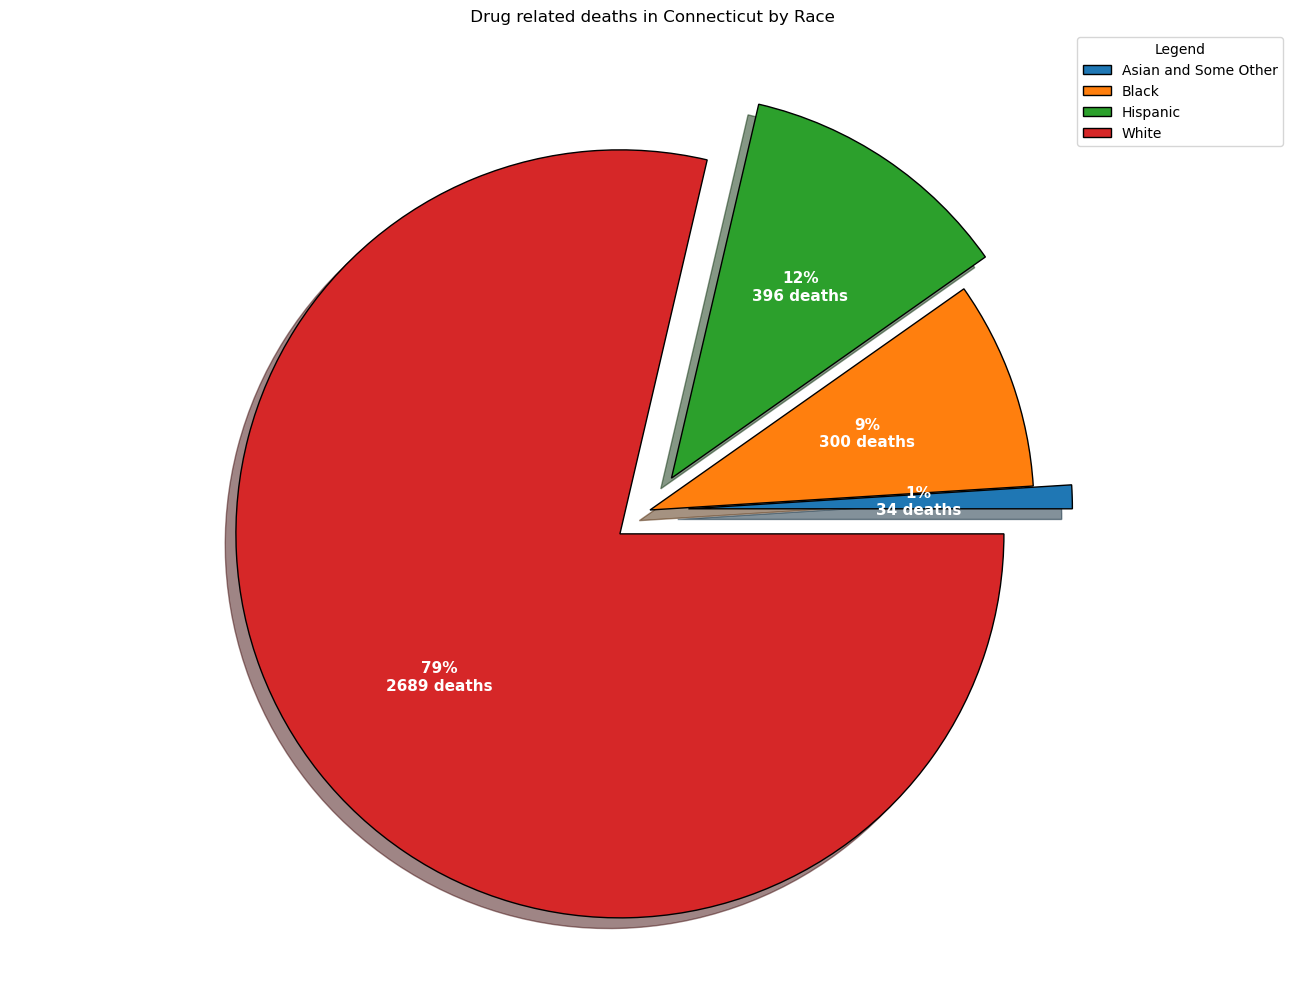

In [22]:
#visualize the pie chart
fig = plt.figure()
ax =fig.add_axes([0,0,2,2])
ax.axis('equal')
ax.pie(values, autopct = my_autopct_function, explode = explode, textprops={'fontsize':11, 'weight': 'bold', 'color': 'white'}, wedgeprops = {'edgecolor': 'black'},shadow=True)
plt.title(" Drug related deaths in Connecticut by Race")
ax.legend(labels, title = "Legend", loc="best")
plt.show()
#autopct function returns List of strings used to Label the wedge with their numerical value
#explode - List the margin in the sequence of data


In [23]:
plt.savefig("image/racechart.png")



<Figure size 640x480 with 0 Axes>

In [15]:
drugLocDF.to_csv("drug_deaths_clean.csv")